In [104]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import numpy as np 
import pandas as pd

import sys
sys.path.append("..")
import argparse
from   os.path import abspath
import gc
import os
from file_processing_loc import *
from non_tracking_T_0 import *


In [106]:
path = "/Users/jbmasson/Desktop/projets-gitlab/tramway_non_tracking/TRamWAy/tramway/track_non_track/data-examples/"
name = "c04_high_density.tsf.xyt"
path_tot = path + name

In [107]:
xyt, xyt_pandas = load_xyt(path_tot)
movie_per_frame, n_unique = convert_to_list(xyt)
dt_theo, t_init, t_end = get_dt(movie_per_frame, n_unique)
sigma, D_high, length_high = get_local_parameters_accessible_elsewhere_in_tramway(dt_theo)


In [108]:
indice   = 55
C        = get_cost_function(indice, movie_per_frame)
#print(C.shape)
C_reduced_corrected, C_reduced, edge, d_max, row_reduced, col_reduced,M,N, n_row_reduced, n_col_reduced,anomaly = correct_cost_function(C,length_high)
#print((n_row_reduced, n_col_reduced))
#print(C_reduced_corrected.shape)
#print((M,N))
assigment, global_row, global_col = get_assigment_matrix_from_reduced_cost(C_reduced_corrected,row_reduced,col_reduced,M,N,n_col_reduced,n_row_reduced,anomaly)
#print((global_row, global_col))

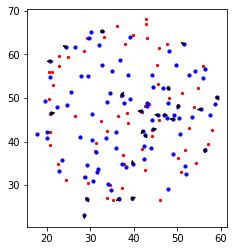

1

In [109]:
plot_linking_two_images(movie_per_frame, indice, global_row, global_col )

In [79]:
liste_assingment, liste_row, liste_col = get_all_assigment_stack(path_tot)

(0, 2001)
(1000, 2001)


In [126]:
indice = 15
print(liste_col[indice+1])

(26,)


In [82]:
print(liste_assingment[0].shape)

(86, 75)


In [127]:
print(liste_row[0])
print(liste_col[0])

[ 4  6 23 32 43 44 47 48 59 60 63 66 77 78 85]
[ 4  1 20 23 36 31 41 48 54 52 53 58 63 68 74]


In [128]:
print(liste_row[1])
print(liste_col[1])

[ 2  4  9 10 20 29 31 35 40 47 52 53 54 55 58 67]
[ 2 11 16 24 28 41 37 45 46 57 61 68 64 62 71 75]


In [134]:
indice = 50
print(movie_per_frame[indice][liste_row[indice],0])
print(movie_per_frame[indice+1][liste_col[indice],0])

print(movie_per_frame[indice+1][liste_row[indice+1],0])
print(movie_per_frame[indice+2][liste_col[indice+1],0])



[23.2724 21.023  28.4708 24.7533 27.9472 34.1207 37.5283 38.1748 36.5855
 36.4854 39.5693 41.9012 44.4351 43.4851 44.2703 45.5884 46.5944 47.8235
 47.9065]
[23.2232 21.018  28.5066 24.6674 27.9869 34.1819 37.7497 37.9713 36.5684
 36.4393 39.5857 41.7883 44.7076 43.5916 44.3172 45.5043 46.6237 47.7228
 47.838 ]
[20.6409 24.6674 21.018  28.5066 32.6311 35.4913 36.5684 37.9713 41.5046
 39.5857 44.2617 43.2173 43.5916 44.3172 46.6237 47.4609 47.838  47.7228
 53.5513 56.3817]


IndexError: index 81 is out of bounds for axis 0 with size 76

In [142]:
indice = 50
xyt1 = movie_per_frame[indice]
xyt2 = movie_per_frame[indice+1]
xyt3 = movie_per_frame[indice+2] 
    
row_ind  = liste_row[indice]
col_ind  = liste_col[indice]    
    
row_ind2  = liste_row[indice+1]
col_ind2  = liste_col[indice+1]   

print(xyt1[row_ind,0])
print(xyt2[col_ind,0])
print(xyt2[row_ind2,0])
print(xyt3[col_ind2,0])





[23.2724 21.023  28.4708 24.7533 27.9472 34.1207 37.5283 38.1748 36.5855
 36.4854 39.5693 41.9012 44.4351 43.4851 44.2703 45.5884 46.5944 47.8235
 47.9065]
[23.2232 21.018  28.5066 24.6674 27.9869 34.1819 37.7497 37.9713 36.5684
 36.4393 39.5857 41.7883 44.7076 43.5916 44.3172 45.5043 46.6237 47.7228
 47.838 ]
[20.6409 24.6674 21.018  28.5066 32.6311 35.4913 36.5684 37.9713 41.5046
 39.5857 44.2617 43.2173 43.5916 44.3172 46.6237 47.4609 47.838  47.7228
 53.5513 56.3817]
[20.744  24.5891 21.2689 28.5621 32.7086 35.4241 36.6515 38.0395 41.4111
 39.6865 44.2578 43.2438 43.5216 44.383  46.5797 47.4812 47.9292 47.7948
 53.5193 56.5661]


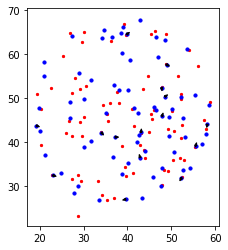

1

In [95]:
indice = 0
plot_linking_from_list(movie_per_frame, indice, liste_row, liste_col )

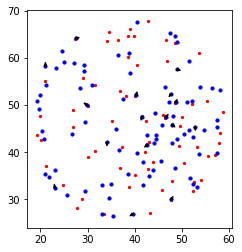

1

In [96]:
indice = 1
plot_linking_from_list(movie_per_frame, indice, liste_row, liste_col )

In [111]:
CC = get_cost_function(55, movie_per_frame)

In [115]:
print(CC[3,0])

47.92670856999991


In [123]:
indice  = 3
indice2 = 0

x2 = movie_per_frame[55+1][indice2,0]
x1 = movie_per_frame[55][indice,0]

y2 = movie_per_frame[55+1][indice2,1]
y1 = movie_per_frame[55][indice,1]

dx = x2 - x1
dy = y2 - y1

C  = dx**2 + dy**2
print(C)

47.92670856999991


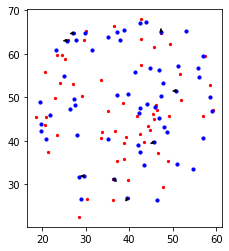

1

In [80]:
indice = 1234
plot_linking_from_list(movie_per_frame, indice, liste_row, liste_col )

In [144]:
path_file = '/Users/jbmasson/Desktop/test_displacement.txt'
liste_array  = position_and_displacement_from_assignment(liste_assingment, liste_row, liste_col,movie_per_frame,path_file)

In [145]:
liste_array.shape

(322233, 6)

(6, 322233)

In [125]:
np.size(liste)

19998

[[ 9.2936173e+00  5.0327801e+00  1.9999000e+04 -9.1685000e-02
  -1.5050020e-01  1.0000000e+00]
 [ 1.2563527e+01  1.2364505e+01  1.9999000e+04  1.1812810e+00
   1.1665900e-01  1.0000000e+00]
 [ 1.6946715e+01  1.2293162e+01  1.9999000e+04  4.6180000e-03
  -5.5891000e-02  1.0000000e+00]
 [ 2.0196069e+01  4.4180148e+01  1.9999000e+04 -1.7421300e-01
   1.1420000e-01  1.0000000e+00]]


In [127]:
liste2  = np.vstack(liste)

In [128]:
liste2.shape

(322233, 6)

In [102]:
np.size([])

0

(0, 20000)
(1000, 20000)
(2000, 20000)
(3000, 20000)
(4000, 20000)
(5000, 20000)
(6000, 20000)
(7000, 20000)
(8000, 20000)
(9000, 20000)
(10000, 20000)
(11000, 20000)
(12000, 20000)
(13000, 20000)
(14000, 20000)
(15000, 20000)
(16000, 20000)
(17000, 20000)
here row
(18000, 20000)
here row
here row
here col
(19000, 20000)
here row
here row
here row


[ 2  9 11 12 13 14 15 17 18 19 21 22 24]
[ 0  3  6  5 11 14 16 18 22 20 23 24 25]


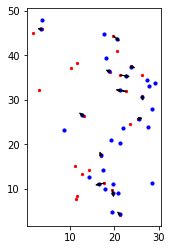

1

In [241]:
indice =15257
print(liste_row[indice])
print(liste_col[indice])
plot_linking_two_images(movie_per_frame, indice, liste_row[indice], liste_col[indice] )

array([0, 1])

array([1, 0])

here row


In [202]:
print((M,N))

(13, 9)


In [203]:
row_eff

array(9)

In [204]:
col_eff

array(3)

In [205]:
ssingment  = np.zeros((M,N))

In [206]:
ssingment.shape

(13, 9)

In [186]:
			row_ind, col_ind = linear_sum_assignment(C_reduced_corrected)
			global_row       = []
			global_col       = []
			assingment       = np.zeros((M,N))

In [187]:
row_ind

array([1])

In [188]:
col_ind

array([0])

In [169]:
		# adjust the isze of the matrix to ensure reasonnable assugments
		edge             = np.zeros((nn,nn)) 
		edge[:,:]        = C_reduced[:,:]
		non_inf          = ~np.isinf(C_reduced)
		edge[non_inf]    = 0
		n_add            = correct_deficiencies(edge)
		nn               = nn + n_add
		## corrected matric cost function 

IndexError: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1

In [ ]:
C_reduced

In [156]:
indice = 18907

In [111]:
C        = get_cost_function(indice, movie_per_frame)
C_reduced_corrected, C_reduced, edge, d_max, row_reduced, col_reduced,M,N, n_row_reduced, n_col_reduced,anomaly = correct_cost_function(C,length_high)

IndexError: too many indices for array

In [147]:
C        = get_cost_function(indice, movie_per_frame)

In [152]:
	(M,N)            = C.shape
	# cut the links
	l2               = length_high**2
	C[C>l2]          = np.inf
	# positions whith no link possible
	non_inf          = ~np.isinf(C)
	num_col          = np.sum(non_inf,axis=0)
	num_row          = np.sum(non_inf,axis=1)
	## portion that need to be optimised
	row_reduced      = np.where(num_row != 0);
	col_reduced      = np.where(num_col != 0);
	n_row_reduced    = np.size(row_reduced)
	n_col_reduced    = np.size(col_reduced)

	nn               = np.maximum(n_row_reduced,n_col_reduced)

In [153]:
		CC               = np.squeeze(C[row_reduced,:])
		CC               = np.squeeze(CC[:,col_reduced])
		#square the matrix
		nn               = np.maximum(n_row_reduced,n_col_reduced)
		C_reduced        = np.zeros((nn,nn))
		#C_reduced        = np.full((nn, nn), np.inf)
		C_reduced[0:n_row_reduced,0] = CC[:]
		d_max            = np.amax(C_reduced , where=~np.isinf(C_reduced) , initial=-1)

		# adjust the isze of the matrix to ensure reasonnable assugments
		edge             = np.zeros((nn,nn)) 
		edge[:,:]        = C_reduced[:,:]
		non_inf          = ~np.isinf(C_reduced)
		edge[non_inf]    = 0
		n_add            = correct_deficiencies(edge)
		nn               = nn + n_add
		## corrected matric cost function 

		C_reduced_corrected  = np.ones((nn,nn))*d_max
		C_reduced_corrected[0:n_row_reduced,0] =  CC[:]
		##elements usefull for final assigment 

		row_reduced      = np.squeeze(np.array(row_reduced))
		col_reduced      = np.squeeze(np.array(col_reduced))

		inf_loc          = np.isinf(C_reduced_corrected)
		C_reduced_corrected[inf_loc] = d_max*1e10
		anomaly          = 1


In [154]:
C_reduced_corrected

array([[1.68502064, 1.68502064],
       [0.05889503, 1.68502064]])

In [150]:
C_reduced_corrected

array([[1.68502064, 1.68502064, 1.68502064],
       [0.05889503, 1.68502064, 1.68502064],
       [1.68502064, 1.68502064, 1.68502064]])

In [133]:
C_reduced

array([[1.68502064, 0.        ],
       [0.05889503, 0.        ]])

In [126]:
C_reduced[0:n_row_reduced,0] = CC[:,:]

ValueError: could not broadcast input array from shape (2,1) into shape (2)

In [ ]:
row_ind, col_ind = linear_sum_assignment(C_reduced_corrected)

In [80]:
print((M,N))

(14, 14)


In [46]:
assigment, global_row, global_col = get_assigment_matrix_from_reduced_cost(C_reduced_corrected,row_reduced,col_reduced,M,N,n_col_reduced,anomaly)

ValueError: expected a matrix (2-d array), got a () array

here


IndexError: too many indices for array

In [42]:
		##elements usefull for final assigment 

		row_reduced      = np.squeeze(np.array(row_reduced))
		col_reduced      = np.squeeze(np.array(col_reduced))

		if nn>1:
			inf_loc          = np.isinf(C_reduced_corrected)
			C_reduced_corrected[inf_loc] = d_max*1e10

0.12542015837800022

In [38]:
test =  np.array([])

In [39]:
print(test)

[]


In [84]:
x = np.array([5]) 


In [85]:
x.shape

(1,)

In [86]:
xx = x[np.newaxis, :]

In [87]:
xx.shape

(1, 1)

In [88]:
print(xx)

[[5]]


In [106]:
np.zeros(1).shape

(1,)

In [107]:
np.size([])

0

In [108]:
np.zeros(1)

array([0.])

In [74]:
C_bis = np.random.rand(1,10)

In [75]:
C_bis

array([[0.20287794, 0.10988956, 0.68449702, 0.8500298 , 0.67685567,
        0.80421226, 0.82166872, 0.53864911, 0.43461457, 0.77267963]])

In [76]:
row_ind, col_ind = linear_sum_assignment(C_bis)

In [77]:
row_ind

array([0])

In [78]:
col_ind

array([1])